In [253]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [112]:
df = pd.read_csv('IRIS.csv')

In [113]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [114]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [267]:

X = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values




In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [229]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


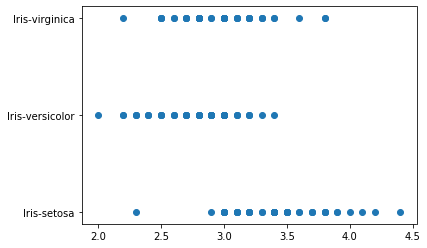

In [265]:
plt.scatter(X[:,1],y)


In [272]:
Y=pd.get_dummies(df['species'])

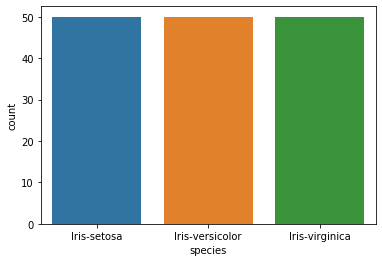

In [271]:
sns.countplot(x='species',data=df)

In [181]:
import keras
from keras.models import Sequential
from keras.layers import Dense



In [238]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))

In [239]:
# Adding the output layer
classifier.add(Dense(units = 3, kernel_initializer = 'uniform', activation = 'softmax'))

In [240]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [241]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'


In [242]:
classifier.fit(X_train, y_train,batch_size = 10, epochs = 100)

Epoch 1/100
120/120 [==============================] - 1s 8ms/step - loss: 1.0976 - acc: 0.3500
Epoch 2/100
120/120 [==============================] - 0s 349us/step - loss: 1.0948 - acc: 0.3667
Epoch 3/100
120/120 [==============================] - 0s 430us/step - loss: 1.0907 - acc: 0.3667
Epoch 4/100
120/120 [==============================] - 0s 324us/step - loss: 1.0852 - acc: 0.3667
Epoch 5/100
120/120 [==============================] - 0s 457us/step - loss: 1.0782 - acc: 0.3667
Epoch 6/100
120/120 [==============================] - 0s 398us/step - loss: 1.0684 - acc: 0.3667
Epoch 7/100
120/120 [==============================] - 0s 471us/step - loss: 1.0571 - acc: 0.3667
Epoch 8/100
120/120 [==============================] - 0s 407us/step - loss: 1.0435 - acc: 0.3667
Epoch 9/100
120/120 [==============================] - 0s 341us/step - loss: 1.0283 - acc: 0.3667
Epoch 10/100
120/120 [==============================] - 0s 414us/step - loss: 1.0124 - acc: 0.3667
Epoch 11/100
120/120 

120/120 [==============================] - 0s 322us/step - loss: 0.4345 - acc: 0.9000
Epoch 84/100
120/120 [==============================] - 0s 341us/step - loss: 0.4303 - acc: 0.9000
Epoch 85/100
120/120 [==============================] - 0s 258us/step - loss: 0.4263 - acc: 0.9000
Epoch 86/100
120/120 [==============================] - 0s 224us/step - loss: 0.4223 - acc: 0.9000
Epoch 87/100
120/120 [==============================] - 0s 250us/step - loss: 0.4187 - acc: 0.9000
Epoch 88/100
120/120 [==============================] - 0s 366us/step - loss: 0.4146 - acc: 0.9083
Epoch 89/100
120/120 [==============================] - 0s 299us/step - loss: 0.4108 - acc: 0.9083
Epoch 90/100
120/120 [==============================] - 0s 440us/step - loss: 0.4070 - acc: 0.9083
Epoch 91/100
120/120 [==============================] - 0s 457us/step - loss: 0.4034 - acc: 0.9083
Epoch 92/100
120/120 [==============================] - 0s 374us/step - loss: 0.3995 - acc: 0.9083
Epoch 93/100
120/120 [=

In [243]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [244]:
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_47 (Dense)             (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
None


In [245]:
score,acc =classifier.evaluate(X_test,y_test,batch_size=10,verbose=2)

In [246]:
print(acc)

0.8666666746139526


In [226]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test.values.argmax(axis=1),y_pred.argmax(axis=1))#We are using our output with argmax becaue our input to confusion matrix must be a list of prediction not encoded data.


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [252]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.77      0.87        13
           2       0.83      0.83      0.83         6

   micro avg       0.96      0.87      0.91        30
   macro avg       0.94      0.87      0.90        30
weighted avg       0.97      0.87      0.91        30
 samples avg       0.87      0.87      0.87        30

